In [1]:
import sys
sys.path.append('/home/sophie/Workspace')

import numpy as np
import matplotlib.pylab as plt
from scipy import stats
import pandas as pd
from BrainEmbeddingPhase2.B2BNet.debug_leave_one_utility \
    import LeaveOne
from BrainEmbeddingPhase2.B2BNet.cluster_scoring import *


In [2]:
prob_matrices_results = get_prob_matrices()

100%|██████████| 216/216 [00:00<00:00, 893.19it/s]
/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/load_group_data.py:109: RuntimeWarning: invalid value encountered in true_divide
  individuals_relative[ta1a3_group[i]] = individuals_norm[ta1a3_group[i]] / norm_ta1a3


(24, 188) (2, 192)
a1a3_hubs:[32, 47, 57, 61, 71] 
typical_hubs:[15, 28, 29, 61, 81]
initial clusters:[{32, 34, 67, 36, 70, 7, 43, 46, 53, 22, 87, 58}, {68, 10, 12, 44, 76, 47, 17, 18, 51, 52, 83, 54, 84, 25, 59, 31}, {0, 8, 9, 13, 16, 19, 21, 24, 26, 29, 30, 39, 48, 50, 56, 57, 62, 66, 73, 74, 85}, {1, 2, 3, 11, 14, 15, 20, 23, 27, 28, 37, 38, 42, 55, 60, 61, 63, 72, 75, 77, 78, 79, 81, 82, 86}, {64, 33, 65, 35, 4, 5, 6, 69, 40, 41, 71, 45, 80, 49}]
initial clusters:[{32, 2, 5, 70, 39, 73, 74, 77, 15, 49, 51, 55, 57, 26, 59, 31}, {65, 4, 36, 37, 38, 69, 47, 18, 50, 28, 30}, {0, 35, 67, 6, 7, 9, 11, 44, 75, 52, 21, 53, 54, 29}, {34, 68, 40, 41, 72, 43, 78, 83, 20, 22, 24, 58, 27, 61}, {1, 3, 8, 10, 12, 13, 14, 16, 17, 19, 23, 25, 33, 42, 45, 46, 48, 56, 60, 62, 63, 64, 66, 71, 76, 79, 80, 81, 82}]


In [3]:

matrix_for_scoring, sample_weight= generate_prob_matrix_with_cluster_labels(
        *prob_matrices_results[:-4])


In [4]:
a1a3_clusters = prob_matrices_results[4]
typical_clusters = prob_matrices_results[5]

In [5]:
print(a1a3_clusters)

[{32, 34, 67, 36, 70, 7, 43, 46, 53, 22, 87, 58}, {68, 10, 12, 44, 76, 47, 17, 18, 51, 52, 83, 54, 84, 25, 59, 31}, {0, 8, 9, 13, 16, 19, 21, 24, 26, 29, 30, 39, 48, 50, 56, 57, 62, 66, 73, 74, 85}, {1, 2, 3, 11, 14, 15, 20, 23, 27, 28, 37, 38, 42, 55, 60, 61, 63, 72, 75, 77, 78, 79, 81, 82, 86}, {64, 33, 65, 35, 4, 5, 6, 69, 40, 41, 71, 45, 80, 49}]


In [6]:
print(typical_clusters)

[{32, 2, 5, 70, 39, 73, 74, 77, 15, 49, 51, 55, 57, 26, 59, 31}, {65, 4, 36, 37, 38, 69, 47, 18, 50, 28, 30}, {0, 35, 67, 6, 7, 9, 11, 44, 75, 52, 21, 53, 54, 29}, {34, 68, 40, 41, 72, 43, 78, 83, 20, 22, 24, 58, 27, 61}, {1, 3, 8, 10, 12, 13, 14, 16, 17, 19, 23, 25, 33, 42, 45, 46, 48, 56, 60, 62, 63, 64, 66, 71, 76, 79, 80, 81, 82}]


In [7]:
len_a1a3_clusters = len(a1a3_clusters)
len_typical_clusters = len(typical_clusters)
list_cluster_label = np.zeros(172)
for i in range(172):
    if i < 88:
        for cluster_idx in range(len_a1a3_clusters):
            if i in a1a3_clusters[cluster_idx]:
                list_cluster_label[i] = cluster_idx
    if i >= 88:
        for cluster_idx in range(len_typical_clusters):
            if i-88 in typical_clusters[cluster_idx]:
                list_cluster_label[i] = cluster_idx +  len_a1a3_clusters 
                    
    


In [8]:
list_cluster_label

array([2., 3., 3., 3., 4., 4., 4., 0., 2., 2., 1., 3., 1., 2., 3., 3., 2.,
       1., 1., 2., 3., 2., 0., 3., 2., 1., 2., 3., 3., 2., 2., 1., 0., 4.,
       0., 4., 0., 3., 3., 2., 4., 4., 3., 0., 1., 4., 0., 1., 2., 4., 2.,
       1., 1., 0., 1., 3., 2., 2., 0., 1., 3., 3., 2., 3., 4., 4., 2., 0.,
       1., 4., 0., 4., 3., 2., 2., 3., 1., 3., 3., 3., 4., 3., 3., 1., 1.,
       2., 3., 0., 7., 9., 5., 9., 6., 5., 7., 7., 9., 7., 9., 7., 9., 9.,
       9., 5., 9., 9., 6., 9., 8., 7., 8., 9., 8., 9., 5., 8., 6., 7., 6.,
       5., 5., 9., 8., 7., 6., 6., 6., 5., 8., 8., 9., 8., 7., 9., 9., 6.,
       9., 5., 6., 5., 7., 7., 7., 5., 9., 5., 8., 5., 9., 8., 9., 9., 9.,
       6., 9., 7., 8., 6., 5., 9., 8., 5., 5., 7., 9., 5., 8., 9., 9., 9.,
       9., 8.])

In [9]:
diver_a1a3_g1cent, diver_a1a3_g2cent, diver_typical_g1cent, diver_typical_g2cent = prob_matrices_results[-4:]

In [10]:
df_list_cluster_label = pd.DataFrame(list_cluster_label)

In [11]:
print(df_list_cluster_label)

       0
0    2.0
1    3.0
2    3.0
3    3.0
4    4.0
..   ...
167  9.0
168  9.0
169  9.0
170  9.0
171  8.0

[172 rows x 1 columns]


In [12]:
diver_a1a3_cents = np.concatenate([diver_a1a3_g1cent,diver_a1a3_g2cent], axis=1 )
diver_typical_cents = np.concatenate([diver_typical_g1cent,diver_typical_g2cent], axis=1 )


In [13]:
df_b_cents = pd.DataFrame(np.concatenate([diver_a1a3_cents,diver_typical_cents]))

In [14]:
df_b_cents_with_label = pd.concat([df_b_cents, df_list_cluster_label],axis=1) 

In [25]:
a=[33,55,73,3,5,7]

In [26]:
np.sort(a)

array([ 3,  5,  7, 33, 55, 73])

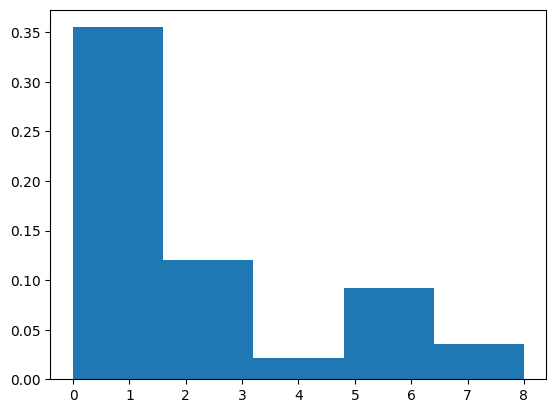

In [62]:
hist_smallest = []
for i in range(88):
    hist_smallest.append( int( np.where(np.argsort(df_b_cents.values[:88],axis=1)[i]  
                    ==  df_list_cluster_label.values.reshape(-1)[:88][i]) [0] ))
plt.hist(hist_smallest, density=True, bins=5)
plt.show()


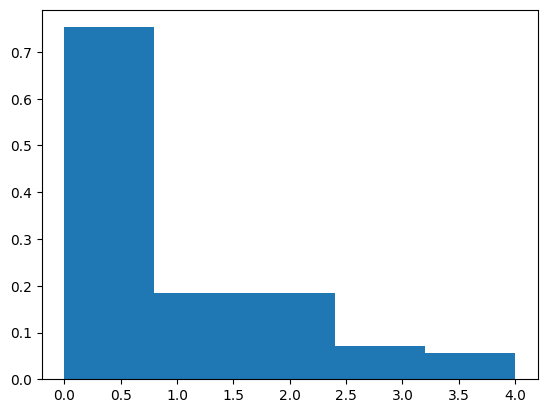

In [61]:
hist_smallest = []
sorted_diver_a1a3_cents  = np.argsort(df_b_cents.values[:88,:5],axis=1)
a1a3_labels_list = df_list_cluster_label.values.reshape(-1)[:88]
for i in range(88):
    hist_smallest.append(int(np.where(sorted_diver_a1a3_cents[i]  ==  a1a3_labels_list[i]) [0] ))

plt.hist(hist_smallest, density=True, bins=5)
plt.show()

In [43]:
np.shape(df_b_cents.values)

(172, 10)

In [24]:
np.count_nonzero(np.argmin(df_b_cents.values[88:],axis=1)> 5)

25

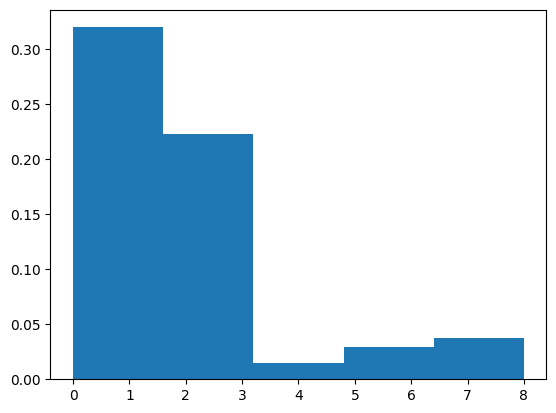

In [59]:
hist_smallest = []
for i in range(84):
    hist_smallest.append( int( np.where(np.argsort(df_b_cents.values[88:],axis=1)[i]  
                    ==  df_list_cluster_label.values.reshape(-1)[88:][i]) [0] ))
plt.hist(hist_smallest, density=True, bins=5)
plt.show()

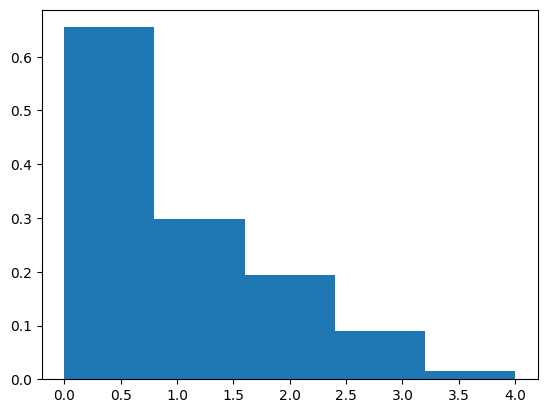

In [60]:
hist_smallest = []
sorted_diver_typical_cents  = np.argsort(df_b_cents.values[88:,5:],axis=1)
typical_labels_list = df_list_cluster_label.values.reshape(-1)[88:]
for i in range(84):
    hist_smallest.append(int(np.where(sorted_diver_typical_cents[i]  ==  typical_labels_list[i]-5) [0] ))

plt.hist(hist_smallest, density=True, bins=5)
plt.show()

In [53]:
df_list_cluster_label.values.reshape(-1)

array([2., 3., 3., 3., 4., 4., 4., 0., 2., 2., 1., 3., 1., 2., 3., 3., 2.,
       1., 1., 2., 3., 2., 0., 3., 2., 1., 2., 3., 3., 2., 2., 1., 0., 4.,
       0., 4., 0., 3., 3., 2., 4., 4., 3., 0., 1., 4., 0., 1., 2., 4., 2.,
       1., 1., 0., 1., 3., 2., 2., 0., 1., 3., 3., 2., 3., 4., 4., 2., 0.,
       1., 4., 0., 4., 3., 2., 2., 3., 1., 3., 3., 3., 4., 3., 3., 1., 1.,
       2., 3., 0., 7., 9., 5., 9., 6., 5., 7., 7., 9., 7., 9., 7., 9., 9.,
       9., 5., 9., 9., 6., 9., 8., 7., 8., 9., 8., 9., 5., 8., 6., 7., 6.,
       5., 5., 9., 8., 7., 6., 6., 6., 5., 8., 8., 9., 8., 7., 9., 9., 6.,
       9., 5., 6., 5., 7., 7., 7., 5., 9., 5., 8., 5., 9., 8., 9., 9., 9.,
       6., 9., 7., 8., 6., 5., 9., 8., 5., 5., 7., 9., 5., 8., 9., 9., 9.,
       9., 8.])

In [15]:
df_b_cents_with_label

0          1          2         3          4          5  \
0     2.175623   2.727307   1.953454  1.021556   1.934589   4.030763   
1     3.973318   3.161652   4.437214  2.072927   3.196663   4.963391   
2     5.527543   4.797312   4.963425  2.504057   4.689024   7.577083   
3     6.277041   5.374507   6.498120  3.900675   5.614167   7.913333   
4    13.355032  10.716936  13.129285  7.532048  12.192442  15.936929   
..         ...        ...        ...       ...        ...        ...   
167   1.695408   2.077818   1.572993  1.137082   1.179755   2.016319   
168   8.121377   6.600169   7.414428  3.617373   6.070710   9.018886   
169   0.542188   1.241587   1.110860  0.741741   0.612593   0.931080   
170   0.995851   1.830523   1.433520  1.138827   0.857371   1.208911   
171   7.407912   6.073150   6.758286  2.821039   6.060498  10.792955   

             6         7         8         9    0  
0     1.234858  2.395349  1.090673  1.581893  2.0  
1     3.128577  2.780794  2.805868  2.622909  3.0  
2     4.156636  3.986402  3.420150  3.530347  3.0  
3     6.475444  5.114115  5.035048  5.652343  3.0  
4    11.230342  8.628477  7.453252  9.778910  4.0  
..         ...       ...       ...       ...  ...  
167   1.666672  1.892970  1.420324  0.809183  9.0  
168   5.543187  4.721715  3.323286  4.525336  9.0  
169   0.937357  1.240140  1.051106  0.388774  9.0  
170   1.456247  1.827075  1.526295  0.641678  9.0  
171   5.055000  4.711506  3.929296  5.117759  8.0  

[172 rows x 11 columns]

In [16]:
prefix = '/media/sophie/'
experiment_path = 'Samsung_T5/Experiment2019/K-fold_NYU/'

df_b_cents_with_label.to_excel(prefix+experiment_path +"leave_none_skewnorm_fglb_diag_scoring_v3_predicted_refined_clusters0830.xlsx")

In [17]:
reg_list, reg_predict_list = cluster_scoring_training(matrix_for_scoring, sample_weight)

In [18]:
predicted_score = np.array(reg_predict_list).T

In [19]:
print(np.shape(sample_weight))

(172, 10)


In [20]:
print(np.shape(predicted_score))

(172, 10)


In [21]:
np.shape(matrix_for_scoring[:,:,-1])

(172, 10)

In [22]:
df_cluster_label = pd.DataFrame(np.argmax(matrix_for_scoring[:,:,-1],axis=1))
df_cluster_label.columns=['cluster_label']

In [23]:
df_predicted_score=pd.DataFrame(predicted_score)

In [24]:
df_argmax_score = pd.DataFrame(np.argmax(df_predicted_score.values, axis=1))

In [25]:
df_argmax_score.columns =['predicted_label']

In [26]:
df_predicted_score_with_argmax = pd.concat([df_predicted_score, df_argmax_score],axis=1)
df_predicted_score_with_labels = pd.concat([df_predicted_score_with_argmax,df_cluster_label], axis=1)

In [27]:
prefix = '/media/sophie/'
experiment_path = 'Samsung_T5/Experiment2019/K-fold_NYU/'
df_predicted_score_with_labels.to_excel(prefix+experiment_path +"leave_none_skewnorm_fglb_diag_scoring_v3_predicted_refined_clusters_with_hubs.xlsx")

In [28]:
df_predicted_score_with_labels

0         1         2         3         4         5         6  \
0   -0.236842 -0.241250  0.142947  0.719440  0.333807  0.032602 -0.004347   
1   -0.236842 -0.260259 -0.253536  0.781706 -0.355772 -0.341614  0.010302   
2   -0.236842 -0.150802 -0.127111  0.722646 -0.293050 -0.314637 -0.349507   
3   -0.236842  0.352210 -0.080237  0.931650 -0.335484 -0.313700 -0.254270   
4   -0.236842  0.450578 -0.083142  0.456211 -0.317324 -0.313700 -0.251320   
..        ...       ...       ...       ...       ...       ...       ...   
167 -0.236842 -0.097463  0.335371  0.554279  0.380313 -0.503641  0.740685   
168 -0.236842 -0.720719 -0.151216  0.733489 -0.314656 -0.314454 -0.082394   
169 -0.236842  0.135825 -0.730323  0.016072 -0.085759  0.536032  1.086811   
170 -0.236842  0.381843  0.591580 -0.009431  0.279063 -0.310320 -0.088904   
171 -0.236842 -0.078877 -0.096845  0.427074 -0.318119 -0.313688 -0.256074   

            7         8         9  predicted_label  cluster_label  
0   -0.185754 -0.828360 -0.056912                3              3  
1   -0.455583  0.658161 -0.057708                3              3  
2    0.377744  0.647142 -0.011128                3              3  
3    0.217166  0.656393 -0.098960                3              3  
4    0.124728  0.287178 -0.030554                3              3  
..        ...       ...       ...              ...            ...  
167 -0.173216 -0.138306  0.710902                6              9  
168 -0.803028  0.505203  0.413399                3              8  
169 -0.159323 -0.433746  0.770412                6              9  
170 -0.546984 -0.239614  0.753100                9              9  
171  0.216121  0.577631 -0.131741                8              8  

[172 rows x 12 columns]

In [14]:
np.shape(matrix_for_scoring[:,:,-1])

(172, 10)

In [15]:
for reg in reg_list:
    print(reg.coef_)
    print(reg.intercept_)

[ 0.62539385 -1.36807069 -1.19213355 -0.26167528 -1.77357029  3.87219019
  0.2517213   0.50873586  0.57306278  0.96228668]
-0.19622420720707728
[  4.82888053   3.60083619   8.99312788 -11.61750105  -2.58691721
 -10.7287607   -2.82089956   4.45365471   0.47578845   2.06594477]
0.11672274218487934
[ 4.85675522 -1.01351548  2.90358303 -0.36956059 -5.46980254  5.7218095
 -4.64401234 -0.38073544  0.34468546  3.52211608]
-0.22013422760323054
[ 11.0687338  -11.36470184  -1.33193481   3.7263016   -2.84160429
  -6.77986291  -0.17758568   5.86246371  -4.13109079   2.11473597]
0.37361738031983227
[ 2.38257756 -7.35479656  2.6174613  -0.6441597   3.02953298 -3.58689283
 -3.1518071   5.94299896 -1.07524097  4.19573352]
-0.13302397887371475
[-10.31092683   0.16027821  11.64740879   3.20942403   1.97923028
   3.65387153  -5.06620915  -0.55782777   0.38586074   0.02134455]
-0.5821096325787342
[-3.01779570e+00  1.62672852e-01  2.14932074e+00  5.64210889e-01
  4.42349273e-01  1.23279379e+00  9.70063257e

In [16]:
df_1st_prob_matrix = pd.DataFrame(matrix_for_scoring[:,0,:-1])
df_1st_cluster_label = pd.DataFrame(matrix_for_scoring[:,0,-1])
df_1st_cluster_predcit = pd.DataFrame(reg_predict_list[0])

In [17]:
df_1st_debug = pd.concat([df_1st_prob_matrix, df_1st_cluster_label,df_1st_cluster_predcit ], axis = 1)

In [18]:
np.shape(df_1st_debug.values)

(172, 12)

In [19]:
df_1st_debug.to_excel(prefix+experiment_path +"leave_none_skewnorm_fglb_diag_scoring_debug_1st.xlsx")

In [20]:
X = matrix_for_scoring[:, :, :-1]

In [21]:
this_x= X[:, 0, :]

In [22]:
np.shape(this_x)

(172, 10)

In [23]:
np.count_nonzero(df_1st_cluster_label.values * df_1st_cluster_predcit.values > 0)

99

In [24]:
np.count_nonzero(True)

1

In [25]:
df_4th_prob_matrix = pd.DataFrame(matrix_for_scoring[:,3,:-1])
df_4th_cluster_label = pd.DataFrame(matrix_for_scoring[:,3,-1])
df_4th_cluster_predcit = pd.DataFrame(reg_predict_list[3])
df_4th_debug = pd.concat([df_4th_prob_matrix, df_4th_cluster_label,df_4th_cluster_predcit ], axis = 1)
df_4th_debug.to_excel(prefix+experiment_path +"leave_none_skewnorm_fglb_diag_scoring_debug_4th.xlsx")

In [26]:
np.count_nonzero(df_4th_cluster_label.values * df_4th_cluster_predcit.values > 0)

96

In [36]:
with pd.ExcelWriter(prefix+experiment_path+"leave_none_skewnorm_fglb_diag_scoring_label_debug.xlsx") as writer: 
    for x in range(10):
        df_xth_prob_matrix = pd.DataFrame(matrix_for_scoring[:,x,:-1])
        df_xth_cluster_label = pd.DataFrame(matrix_for_scoring[:,x,-1])
        df_xth_cluster_predcit = pd.DataFrame(reg_predict_list[x])
        df_xth_debug = pd.concat([df_xth_prob_matrix, df_xth_cluster_label,df_xth_cluster_predcit ], axis = 1)
        sheet_str = f"No.{x}"
        df_xth_debug.to_excel(writer, sheet_name = sheet_str)

        #np.count_nonzero(df_xth_cluster_label.values * df_xth_cluster_predcit.values > 0)

In [17]:
print(np.shape(predicted_score))
print(np.shape(df_cluster_label))

(172, 10)
(172, 1)


In [21]:
df_matrix_for_scoring = pd.DataFrame(matrix_for_scoring[:,:,:-1].reshape(172,-1))

In [26]:
df_cluster_score = pd.DataFrame(matrix_for_scoring[:,:,-1])

In [27]:
df_all = pd.concat([df_matrix_for_scoring, df_predicted_score, df_cluster_score],axis=1)

In [28]:
df_all.to_excel(prefix+experiment_path+"leave_none_skewnorm_fglb_diag_scoring_all.xlsx")